In [1]:
from pylab import rcParams
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

Loading data

In [2]:
features = [i for i in range(1,86)]
loc = r'/home/sadat/Documents/DSE/Data/HW4_210/Animals_with_Attributes/'
predicates = pd.read_csv(loc+'predicates.txt', delimiter='\t', names=['id','feature'])
classes = pd.read_csv(loc+'classes.txt', delimiter='\t', names=['id','animal'])
continuous = pd.read_fwf(loc+'predicate-matrix-continuous.txt', names=features)

Looking at the 50 animals in classes

In [3]:
classes.head()

,id,animal
0,1,antelope
1,2,grizzly+bear
2,3,killer+whale
3,4,beaver
4,5,dalmatian


Looking at the 85 features of each class

In [4]:
predicates.head()

,id,feature
0,1,black
1,2,white
2,3,blue
3,4,brown
4,5,gray


The features are given in a continuous range in a 50x85 matrix

In [5]:
continuous.head()

,1,2,3,4,5,6,7,8,9,10,...,76,77,78,79,80,81,82,83,84,85
0,-1.00,-1.00,-1,-1.00,12.34,0,0,0,16.11,9.19,...,0.00,0.00,1.23,10.49,39.24,17.57,50.59,2.35,9.70,8.38
1,39.25,1.39,0,74.14,3.75,0,0,0,1.25,0.00,...,7.64,9.79,53.14,61.80,12.50,24.00,3.12,58.64,20.14,11.39
2,83.40,64.79,0,0.00,1.25,0,0,0,68.49,32.69,...,79.49,0.00,0.00,38.27,9.77,52.03,24.94,15.77,13.41,15.42
3,19.38,0.00,0,87.81,7.50,0,0,0,0.00,7.50,...,65.62,0.00,0.00,3.75,31.88,41.88,23.44,31.88,33.44,13.12
4,69.58,73.33,0,6.39,0.00,0,0,0,37.08,100.00,...,1.25,6.25,0.00,9.38,31.67,53.26,24.44,29.38,11.25,72.71


Performing a K Means cluster analysis with 10 clusters on the dataset

In [6]:
km = KMeans(n_clusters=10)
km.fit(continuous.values)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=10, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [7]:
clusters = km.predict(continuous.values)
clusters

array([6, 7, 4, 9, 0, 0, 6, 0, 4, 0, 2, 9, 5, 1, 5, 6, 8, 4, 1, 8, 3, 5, 3,
       4, 8, 2, 2, 1, 2, 9, 6, 5, 0, 9, 9, 4, 3, 6, 3, 6, 5, 3, 5, 2, 7, 0,
       4, 9, 3, 4], dtype=int32)

In [8]:
class_array = classes['animal'].values
cluster_dict = {}
for i in range(50):
    try:
        cluster_dict[clusters[i]].append(class_array[i])
    except:
        cluster_dict[clusters[i]] = []
        cluster_dict[clusters[i]].append(class_array[i])

for i in range(len(cluster_dict)):
    print str(i)+':',cluster_dict[i],'\n'

0: ['dalmatian', 'persian+cat', 'german+shepherd', 'siamese+cat', 'chihuahua', 'collie'] 

1: ['hippopotamus', 'elephant', 'rhinoceros'] 

2: ['skunk', 'hamster', 'squirrel', 'rabbit', 'mouse'] 

3: ['ox', 'sheep', 'buffalo', 'giant+panda', 'pig', 'cow'] 

4: ['killer+whale', 'blue+whale', 'humpback+whale', 'seal', 'otter', 'walrus', 'dolphin'] 

5: ['tiger', 'leopard', 'fox', 'wolf', 'bobcat', 'lion'] 

6: ['antelope', 'horse', 'moose', 'giraffe', 'zebra', 'deer'] 

7: ['grizzly+bear', 'polar+bear'] 

8: ['spider+monkey', 'gorilla', 'chimpanzee'] 

9: ['beaver', 'mole', 'bat', 'rat', 'weasel', 'raccoon'] 



The 10 cluster K-Means output does not make sense. 

Next, we will perform Hierarchial Clustering.

{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'b',
  'b'],
 'dcoord': [[0.0, 141.96461213978645, 141.96461213978645, 0.0],
  [0.0, 166.85374383972729, 166.85374383972729, 141.96461213978645],
  [0.0, 129.1297622548729, 129.1297622548729, 0.0],
  [0.0, 165.17636211032135, 165.17636211032135, 0.0],
  [129.1297622548729,
   184.81048603907729,
   184.81048603907729,
   165.17636211032135],
  [166.85374383972729,
   261.57646828322265,
   261.57646828322265,
   184.81048603907729],
  [0.0, 133.45206405297748, 133.45206405297748, 0.0],
  [0.0, 126.38570449224072, 126.38570449224072, 0.0],
  [0.0, 153.7480166809749, 153.7480166809749, 126.38570449224072],
  [133.45206405297748,
   181.1466157196061

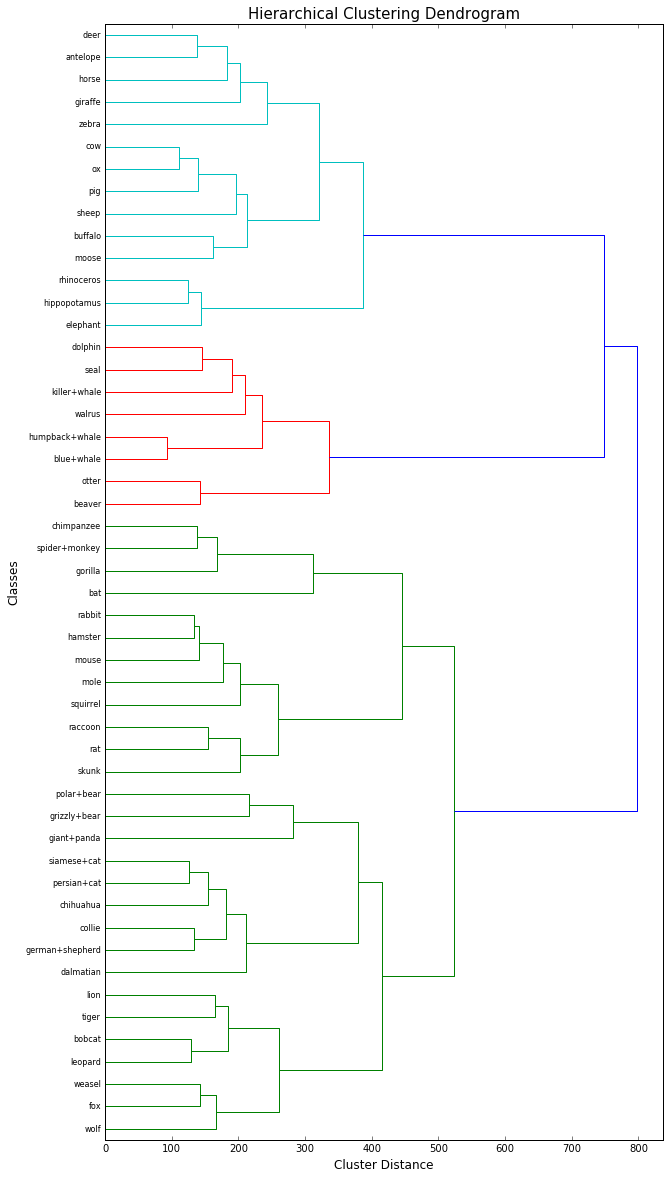

In [9]:
Z = linkage(continuous.values, 'ward')
rcParams[u'figure.figsize'] = [10, 20]
plt.title('Hierarchical Clustering Dendrogram', fontsize=15)
plt.xlabel('Cluster Distance', fontsize=12)
plt.ylabel('Classes', fontsize=12)
dendrogram(Z, orientation='right', labels=classes['animal'].values)